IMPORTING THE LIBRARIES

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORTING THE DATASET

In [29]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

IMPLEMENTING THOMPSON SAMPLING

In [30]:
import random
N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

In [31]:
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

VISUALISING THE RESULTS - HISTOGRAM

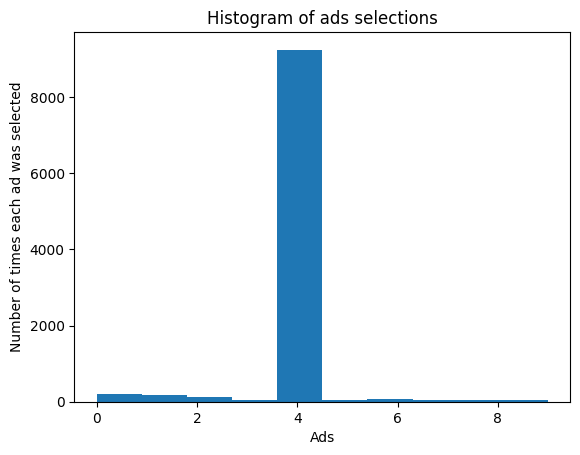

In [32]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()